2023-S1-41 Project: Electricity Demand Forecasting Using Machine Learning

Jin He, Ting Zhang, Zhongyuan Zhang



content links

1. Introduction

2. Literture Review

3. Reserch Problem

4. Dataset

In [5]:
# Library 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#. import statsmodels.api as sm

4.1  Dataset
The dataset covers 2016 days between 1 January 2015 and 6 October 2020. During some intraday intervals RRP was negative, so that energy producers were paying consumers rather than wise versa.

In [6]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/jhe117/9785-23-08/Project-Report/complete_dataset.csv')

"""# Replace the URL with the URL of the CSV file on your GitHub repository
url = 'https://raw.githubusercontent.com/yourusername/yourrepositoryname/main/electricity-demand-in-victoria-australia.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(url)

# View the first few rows of the DataFrame
print(df.head())"""


"# Replace the URL with the URL of the CSV file on your GitHub repository\nurl = 'https://raw.githubusercontent.com/yourusername/yourrepositoryname/main/electricity-demand-in-victoria-australia.csv'\n\n# Load the dataset into a DataFrame\ndf = pd.read_csv(url)\n\n# View the first few rows of the DataFrame\nprint(df.head())"

4.2  Dataset Description
The dataset covers 2016 days between 1 January 2015 and 6 October 2020. During some intraday intervals RRP was negative, so that energy producers were paying consumers rather than wise versa. Below is a brief description fo the data:

date : datetime, the date of the recording
demand : float, a total daily electricity demand in MWh
RRP : float, a recommended retail price in AUD$ / MWh
demand_pos_RRP : float, a total daily demand at positive RRP in MWh
RRP_positive : float, an averaged positive RRP, weighted by the corresponding intraday demand in AUD$ / MWh
demand_neg_RRP : float, an total daily demand at negative RRP in MWh
RRP_negative : float, an average negative RRP, weighted by the corresponding intraday demand in AUD$ / MWh
frac_at_neg_RRP : float, a fraction of the day when the demand was traded at negative RRP
min_temperature : float, minimum temperature during the day in Celsius
max_temperature : float, maximum temperature during the day in Celsius
solar_exposure : float, total daily sunlight energy in MJ/m^2
rainfall : float, daily rainfall in mm
school_day : boolean, if students were at school on that day
holiday : boolean, if the day was a state or national holiday

In [7]:
# Dataset information
# print(f"Number of rows: {len(df)}, Number of columns: {len(df.columns)}")
print(df.head(3))
print(df.tail(3))

         date     demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.03  25.633696       97319.240     26.415953   
1  2015-01-02  129606.01  33.138988      121082.015     38.837661   
2  2015-01-03  142300.54  34.564855      142300.540     34.564855   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26.8       0.0          N       N  
2             38.2            26.5       0.0          N       N  
            date      demand        RRP  demand_pos_RRP  RRP_positive  \
2103  2020-10-04   94081.565  25.008614       88580.995     26.571687   
2104  2020-10-05  113610.030  36.764

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [9]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


4.3 Data Preprocessing

In [10]:
# Convert the date column to a pandas datetime format
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2105 non-null   float64       
 11  rainfall         2103 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
dtypes: datetime64[ns](1), float64(11), objec

Due to the limited data available in October 2020 (only 6 days with data), the project opted to exclude this data from the analysis. This decision was made to improve the quality of the analysis and reduce the risk of drawing incorrect conclusions.  The final dataset used for analysis spanned from 01 January  2015 to 30 September 2020.

In [11]:
# Filter data to select range of interest
start_date = pd.Timestamp('2015-01-01') 
end_date = pd.Timestamp('2020-09-30')
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask]
df = df.set_index('date')
df = df.sort_index()

In [12]:
print(f"Number of rows: {len(df)}, Number of columns: {len(df.columns)}")
print(df.head(3))
print(df.tail(3))

Number of rows: 2100, Number of columns: 13
               demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                             
2015-01-01   99635.03  25.633696       97319.240     26.415953   
2015-01-02  129606.01  33.138988      121082.015     38.837661   
2015-01-03  142300.54  34.564855      142300.540     34.564855   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-01-01        2315.790     -7.240000         0.020833             13.3   
2015-01-02        8523.995    -47.809777         0.062500             15.4   
2015-01-03           0.000      0.000000         0.000000             20.0   

            max_temperature  solar_exposure  rainfall school_day holiday  
date                                                                      
2015-01-01             26.9            23.6       0.0          N       Y  
2015-01-0

In [13]:
# Check for missing values in the DataFrame
print(df.isna().sum())

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64


In [14]:
# Find the rows that have missing values
rows_with_na = df[df.isna().any(axis=1)]
# Print the rows that have missing values
print(rows_with_na)

                demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                              
2015-06-11  143465.445  37.481829      143465.445     37.481829   
2017-11-26  108717.875  83.114514      108717.875     83.114514   
2018-10-09  116449.310  99.000749      116449.310     99.000749   
2018-10-10  109551.080  73.539698      109551.080     73.539698   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-06-11             0.0           0.0              0.0              5.7   
2017-11-26             0.0           0.0              0.0             19.4   
2018-10-09             0.0           0.0              0.0             16.1   
2018-10-10             0.0           0.0              0.0             10.1   

            max_temperature  solar_exposure  rainfall school_day holiday  
date                                                 

The study assumes that missing values in the data are due to random variation or measurement error, rather than systematic errors or changes in the underlying data generation process. 
To address the missing values in the "solar_exposure" column, this project employs a strategy that aims to minimize bias or distortion in the overall dataset. Specifically, missing values are filled with the average value of the previous and subsequent days, which allows for representative values that reflect the overall pattern of the data to be used, while minimizing the impact of extreme values or outliers that could distort the analysis.
For the "rainfall" column, there are instances where NA is missing for two consecutive days. In such cases, the project uses a value of zero to replace the missing values, based on other weather factors from the same day.

In [15]:
# Replace the NA values with the average of the values from the day before and the day after
df['solar_exposure'] = df['solar_exposure'].fillna((df['solar_exposure'].shift(1) + df['solar_exposure'].shift(-1))/2)
# Replace missing values in the "rainfall" column with 0
df['rainfall'].fillna(0, inplace=True)

In [16]:
# Check again for missing values in the DataFrame
print(df.isna().sum())

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


4.4  Dataset Exploratory

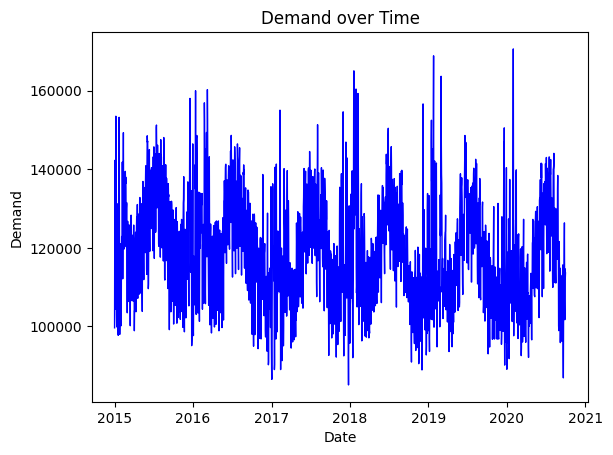

In [17]:
# create a line chart
plt.plot(df.index, df['demand'], color='blue', linewidth=1)

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand over Time')

# display the chart
plt.show()


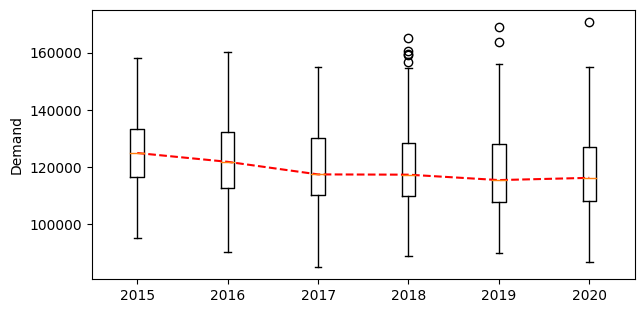

In [20]:
# Group the data by year and calculate the median demand
yearly_demand = df.groupby('year')['demand'].median()

# Create a boxplot for each year
fig, ax = plt.subplots(figsize=(7, 3.5))
for year in yearly_demand.index:
    data = df.loc[df['year'] == year, 'demand']
    ax.boxplot(data.values, positions=[year])

# Add a line for the trend of median value changes
ax.plot(yearly_demand.index, yearly_demand.values, color='red', linestyle='--')

# Add median line
# df_quarterly.groupby('quarter')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)

# Set the x- and y-axis labels
ax.set_xticks(yearly_demand.index)
ax.set_xticklabels(yearly_demand.index)
ax.set_ylabel('Demand')

# Show the plot
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'plot'

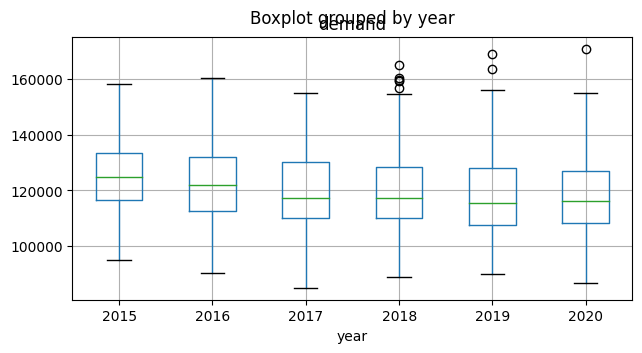

In [21]:
""""fig, ax = plt.subplots(figsize=(7, 3.5))
# df['year'] = df.index.year
df.boxplot(column='demand', by='year', ax=ax)
np.median(df.groupby('year')['demand'].median()).plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by Month')
fig.suptitle('');""""

/tmp/ipykernel_1415/1855925761.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarterly = df.resample('Q').sum()


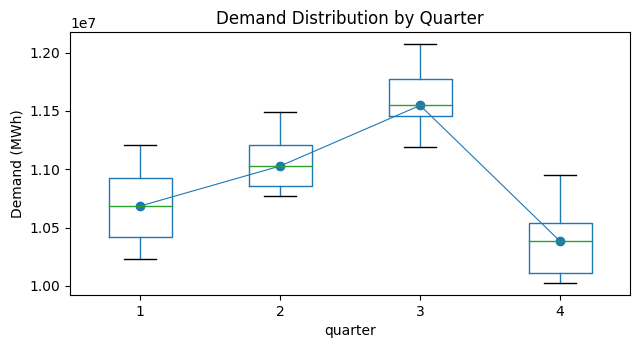

In [22]:
# Group the data by quarter and plot the box plot for each quarter
# Aggregate data by quarter
df_quarterly = df.resample('Q').sum()

# Create figure and axes
fig, ax = plt.subplots(figsize=(7, 3.5))

# Add boxplot for quarterly demand distribution
df_quarterly['quarter'] = df_quarterly.index.quarter
df_quarterly.boxplot(column='demand', by='quarter', ax=ax)

# Add median line
df_quarterly.groupby('quarter')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)

# Set axis labels and title
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by Quarter')
fig.suptitle('')
plt.show()

In [23]:
"""fig, ax = plt.subplots(figsize=(7, 3.5))
df['quarter'] = df.index.quarter
df.boxplot(column='demand', by='quarter', ax=ax)
df.groupby('quarter')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by quarter')
fig.suptitle('');"""


"fig, ax = plt.subplots(figsize=(7, 3.5))\ndf['quarter'] = df.index.quarter\ndf.boxplot(column='demand', by='quarter', ax=ax)\ndf.groupby('quarter')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)\nax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])\nax.set_ylabel('Demand (MWh)')\nax.set_title('Demand Distribution by quarter')\nfig.suptitle('');"

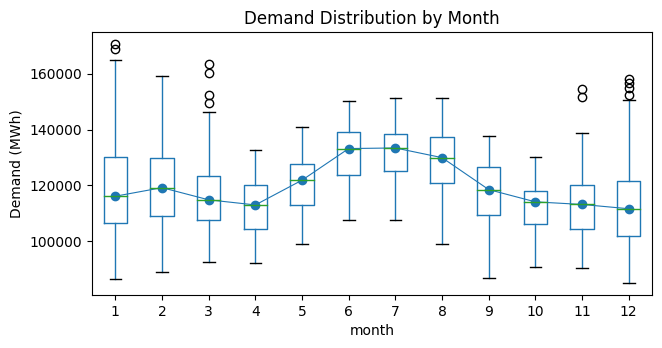

In [24]:
fig, ax = plt.subplots(figsize=(7, 3.5))
df['month'] = df.index.month
df.boxplot(column='demand', by='month', ax=ax,)
df.groupby('month')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by Month')
fig.suptitle('');

Text(0.5, 0.98, '')

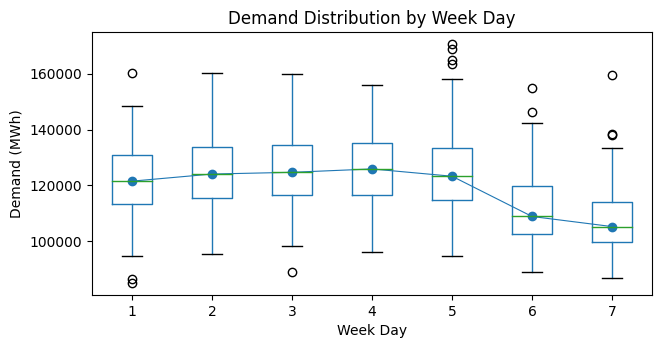

In [25]:
fig, ax = plt.subplots(figsize=(7, 3.5))
df['Week Day'] = df.index.day_of_week + 1
df.boxplot(column='demand', by='Week Day', ax=ax)
df.groupby('Week Day')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by Week Day')
fig.suptitle('')

Text(0, 0.5, 'Holiday')

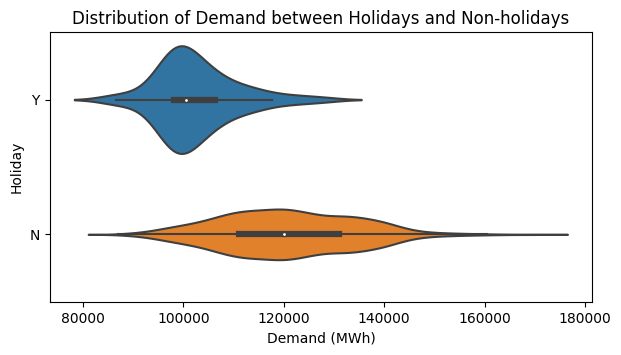

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'demand',
    y       = 'holiday',
    data    = df.assign(Holiday = df.holiday.astype(str)),
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribution of Demand between Holidays and Non-holidays')
ax.set_xlabel('Demand (MWh)')
ax.set_ylabel('Holiday')

Text(0, 0.5, 'School Day')

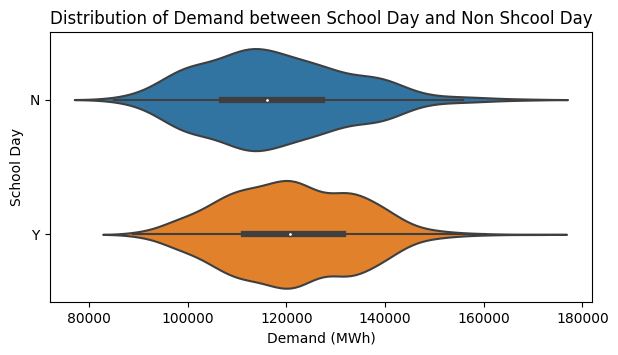

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'demand',
    y       = 'school_day',
    data    = df.assign(School_Day = df.school_day.astype(str)),
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribution of Demand between School Day and Non Shcool Day')
ax.set_xlabel('Demand (MWh)')
ax.set_ylabel('School Day')

/tmp/ipykernel_1415/2785930135.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


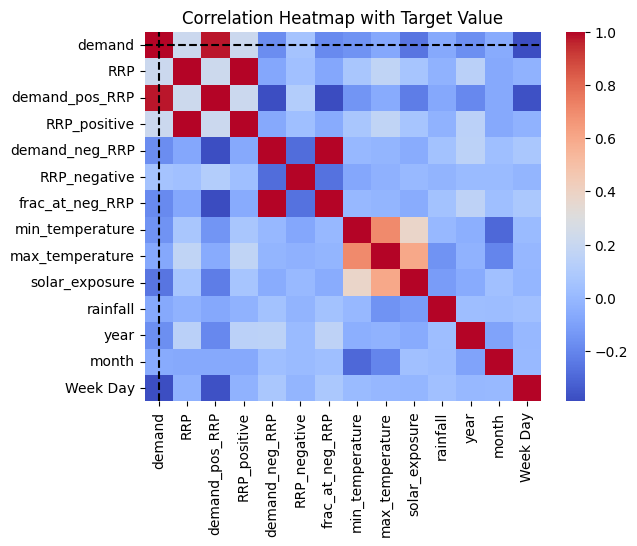

In [35]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap plot
sns.heatmap(corr, cmap='coolwarm')

# Set the target value
target = 0.5

# Add horizontal and vertical lines
plt.axhline(y=target, color='black', linestyle='--')
plt.axvline(x=target, color='black', linestyle='--')

# Set the plot title
plt.title('Correlation Heatmap with Target Value')

# Show the plot
plt.show()